In [1]:
import os
import pandas as pd 

In [2]:
path = '../../Data/UK_Wide_Data'    

# find all csv file paths
csv_names = []

# loop all csv folders
for folder in os.listdir(path):
        
            # extract the CSVs in each folder
            folder_contents = os.listdir(f'{path}/{folder}')
            
            # loop through each file
            for file in folder_contents:
                
                    if "stop-and-search.csv" in file:

                        # add each csv file name    
                        csv_names.append(f'{path}/{folder}/{file}')

# print the number of CSVs -- 108
print(f'There are {len(csv_names)} different CSVs')

There are 1495 different CSVs


In [24]:
stops = []

# loop through the csvs
for csv in csv_names:
    
    # collect the stop and search data
    if "stop-and-search.csv" in csv:
        df = pd.read_csv(csv)
        df["source_file"] = csv  # Add column with the CSV filename
        stops.append(df)
    else:
        print(f'Error with CSV: {csv}')

# concat each df
stops_df = pd.concat(stops, ignore_index=True)

display(stops_df)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file
0,Person search,2020-01-01T00:55:00+00:00,NaN,NaN,51.451062,-2.596436,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,True,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
1,Person search,2020-01-01T01:22:00+00:00,NaN,NaN,51.349567,-2.946702,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
2,Person search,2020-01-01T02:15:00+00:00,NaN,NaN,51.457808,-2.590766,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,True,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
3,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Male,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
4,Person and Vehicle search,2020-01-01T07:00:00+00:00,NaN,NaN,51.452697,-2.560291,Female,18-24,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,../../Data/UK_Wide_Data/2020-01/2020-01-avon-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,../../Data/UK_Wide_Data/2022-12/2022-12-west-y...


In [25]:
stops_df['Year'] = stops_df['Date'].str.split('-').str[0]
# stops_df['Year'] = pd.to_datetime(stops_df['Year'])

stops_df = stops_df[stops_df['Year'] == '2022']








def smart_title(text):
    skip_words = {'and', 'or', 'the', 'of', 'in', 'on', 'at', 'for', 'by'}
    parts = text.split('-')
    new_parts = []
    for p in parts:
        if p.lower() in skip_words:
            new_parts.append(p.lower())
        else:
            new_parts.append(p.capitalize())
    return '-'.join(new_parts)

stops_df['source_file'] = stops_df['source_file'].str.split('/').str[5].str[8:-20].apply(smart_title)




stops_df

C:\Users\15kof\AppData\Local\Temp\ipykernel_18840\3745402711.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_df['source_file'] = stops_df['source_file'].str.split('/').str[5].str[8:-20].apply(smart_title)


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


In [5]:


# stops_df = stops_df.dropna(subset=['Longitude'])






# stops_df['source_file'].str.split('.csv')



stops_df['source_file'].value_counts()

# stops_df

source_file
Metropolitan          145097
Merseyside             53347
West-Midlands          29680
Essex                  17738
West-Yorkshire         17572
Thames-Valley          14127
South-Yorkshire        12549
Kent                   12478
Lancashire             11461
Btp                    10960
Surrey                 10190
Hampshire               9392
Dyfed-Powys             7322
Hertfordshire           6979
Cleveland               6558
Devon-and-Cornwall      5581
Sussex                  5409
Leicestershire          5190
Northumbria             4819
South-Wales             4663
Staffordshire           4322
Norfolk                 4134
Bedfordshire            4131
Suffolk                 4000
West-Mercia             3822
Northamptonshire        3491
Nottinghamshire         3430
Durham                  3377
Cumbria                 3365
Avon-and-Somerset       3286
North-Wales             3277
Lincolnshire            3152
Cambridgeshire          2884
Gwent                   2824
De

In [6]:
stops_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


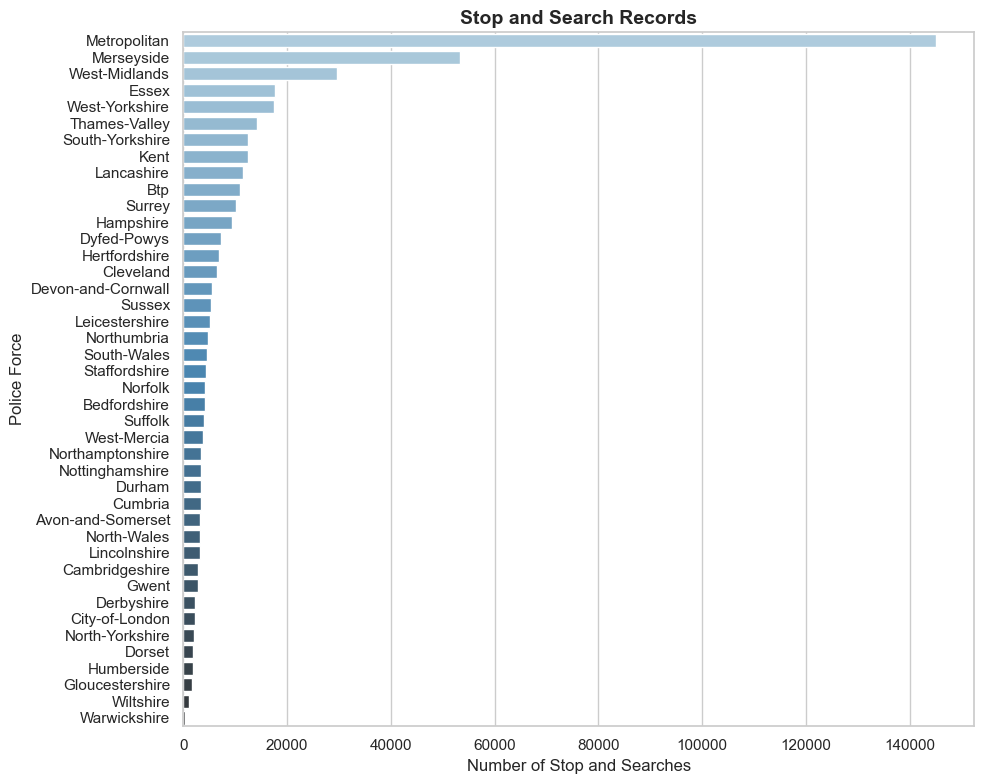

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
# sns.set(style="whitegrid")
sns.set_theme(style="whitegrid")  # or "ticks" for light ticks

# Get the counts and convert to DataFrame for hue compatibility
source_counts = stops_df['source_file'].value_counts().reset_index()
source_counts.columns = ['source_file', 'count']

# Plot using source_file as hue (even though it's just for colour)
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=source_counts,
    x='count',
    y='source_file',
    hue='source_file',
    dodge=False,
    palette='Blues_d',
    legend=False
)

# Add labels and title
plt.xlabel("Number of Stop and Searches", fontsize=12)
plt.ylabel("Police Force", fontsize=12)
plt.title("Stop and Search Records", fontsize=14, weight='bold')

# Add data labels
# for i, v in enumerate(source_counts['count']):
#     ax.text(v + max(source_counts['count']) * 0.01, i, str(v), color='black', va='center', fontsize=10)
plt.savefig('../../Figures/Graphs/stop_and_search_by_county.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()


# Missing Data

In [8]:
import os
import pandas as pd 

In [9]:
stops_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,source_file,Year
1231174,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231175,Person search,2022-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian/Asian British - Pakistani,Asian,NaN,NaN,NaN,NaN,NaN,Avon-and-Somerset,2022
1231176,Person search,2022-01-01T00:08:00+00:00,NaN,NaN,51.491781,-2.519850,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,Avon-and-Somerset,2022
1231177,Person search,2022-01-01T00:30:00+00:00,NaN,NaN,51.453357,-2.597833,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Penalty Notice for Disorder,False,False,Avon-and-Somerset,2022
1231178,Person search,2022-01-01T00:58:00+00:00,NaN,NaN,51.454134,-2.595396,Male,18-24,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,Avon-and-Somerset,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685498,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.791698,-1.848456,Male,18-24,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685499,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685500,Person and Vehicle search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,West-Yorkshire,2022
1685501,Person search,2022-12-31T23:10:00+00:00,False,NaN,53.748284,-1.531368,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,West-Yorkshire,2022


In [10]:
stops_df = stops_df[['Longitude', 'Latitude', 'source_file']]

stops_df

,Longitude,Latitude,source_file
1231174,NaN,NaN,Avon-and-Somerset
1231175,NaN,NaN,Avon-and-Somerset
1231176,-2.519850,51.491781,Avon-and-Somerset
1231177,-2.597833,51.453357,Avon-and-Somerset
1231178,-2.595396,51.454134,Avon-and-Somerset
...,...,...,...
1685498,-1.848456,53.791698,West-Yorkshire
1685499,-1.531368,53.748284,West-Yorkshire
1685500,-1.531368,53.748284,West-Yorkshire
1685501,-1.531368,53.748284,West-Yorkshire


In [11]:
# Count of rows with missing Longitude by region
missing_lng_counts = stops_df[stops_df['Longitude'].isna()]['source_file'].value_counts()
print(missing_lng_counts)


source_file
Metropolitan          15041
South-Yorkshire       12549
Thames-Valley          6227
Lancashire             5501
Nottinghamshire        3430
Cleveland              2170
Merseyside             2079
Hertfordshire          1509
Dyfed-Powys            1423
Humberside             1177
South-Wales            1173
Hampshire              1046
Gwent                   980
West-Yorkshire          914
Devon-and-Cornwall      902
Btp                     901
West-Mercia             797
Bedfordshire            790
City-of-London          596
Avon-and-Somerset       506
Staffordshire           489
Northamptonshire        339
Warwickshire            318
Essex                   282
Suffolk                 260
Norfolk                 203
Cumbria                 196
Dorset                  111
North-Wales             102
North-Yorkshire          76
Derbyshire               60
Lincolnshire             39
Sussex                   25
Kent                     25
Gloucestershire          15
Durham  

In [12]:
# London missing Longitude count
london_missing = stops_df[(stops_df['source_file'] == 'Metropolitan') & (stops_df['Longitude'].isna())].shape[0]

# Merseyside missing Longitude count
merseyside_missing = stops_df[(stops_df['source_file'] == 'Merseyside') & (stops_df['Longitude'].isna())].shape[0]

print(f"London missing Longitude: {london_missing}")
print(f"Merseyside missing Longitude: {merseyside_missing}")


London missing Longitude: 15041
Merseyside missing Longitude: 2079


In [13]:
# Total counts per region
london_total = stops_df[stops_df['source_file'] == 'Metropolitan'].shape[0]
merseyside_total = stops_df[stops_df['source_file'] == 'Merseyside'].shape[0]
west_midlands_total = stops_df[stops_df['source_file'] == 'West-Midlands'].shape[0]

# Missing Longitude counts per region
london_missing = stops_df[(stops_df['source_file'] == 'Metropolitan') & (stops_df['Longitude'].isna())].shape[0]
merseyside_missing = stops_df[(stops_df['source_file'] == 'Merseyside') & (stops_df['Longitude'].isna())].shape[0]
west_midlands_missing = stops_df[(stops_df['source_file'] == 'West-Midlands') & (stops_df['Longitude'].isna())].shape[0]

# Percentage missing
london_pct_missing = (london_missing / london_total) * 100
merseyside_pct_missing = (merseyside_missing / merseyside_total) * 100
west_midlands_pct_missing = (west_midlands_missing / west_midlands_total) * 100

# Print results
print(f"London missing Longitude: {london_missing} of {london_total} ({london_pct_missing:.2f}%)")
print(f"Merseyside missing Longitude: {merseyside_missing} of {merseyside_total} ({merseyside_pct_missing:.2f}%)")
print(f"West Midlands missing Longitude: {west_midlands_missing} of {west_midlands_total} ({west_midlands_pct_missing:.2f}%)")


London missing Longitude: 15041 of 145097 (10.37%)
Merseyside missing Longitude: 2079 of 53347 (3.90%)
West Midlands missing Longitude: 0 of 29680 (0.00%)


# London & Merseyside Ethnicity Breakdown

In [14]:
LSOA_names = pd.read_csv('../../Data/LSOA_data/ONS/2021LSOA_list.csv')

# Define a list of Merseyside boroughs 
#https://www.ons.gov.uk/visualisations/areas/E11000002/ 

# Define a list of London boroughs 
# https://www.ons.gov.uk/visualisations/areas/E12000007/


boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden",
    "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham",
    "Haringey", "Harrow", "Havering", "Hillingdon", "Hounslow", "Islington",
    "Kensington and Chelsea", "Kingston upon Thames", "Lambeth", "Lewisham",
    "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark",
    "Sutton", "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster",
    "City of London" , 
    'Liverpool', 'Wirral', 'Sefton', 'Knowsley', 'St. Helens',
    'Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton'

]

LSOAs = LSOA_names[LSOA_names['LAD23NM'].isin(boroughs)]
LSOAs = LSOAs[['LSOA21CD', 'LAD23NM']]
LSOAs.columns = ['LSOA code', 'Borough']
LSOAs

,LSOA code,Borough
22850,E01006434,Knowsley
22851,E01006435,Knowsley
22852,E01006436,Knowsley
22853,E01006437,Knowsley
22854,E01006438,Knowsley
...,...,...
33995,E01004660,Westminster
33996,E01004661,Westminster
33997,E01004662,Westminster
33998,E01004663,Westminster


https://www.nomisweb.co.uk/sources/census_2021_bulk

In [15]:
LSOA_ethnic = pd.read_csv('../../Data/LSOA_data/ONS/2021census_ethnic.csv') 
LSOA_ethnic

,date,geography,geography code,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian","Ethnic group: Asian, Asian British or Asian Welsh: Pakistani","Ethnic group: Asian, Asian British or Asian Welsh: Other Asian",...,Ethnic group: Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group
0,2021,City of London 001A,E01000001,1474,158,4,66,49,2,37,...,18,1181,822,32,0,11,316,68,22,46
1,2021,City of London 001B,E01000002,1386,181,7,102,37,3,32,...,28,1084,734,42,0,6,302,50,13,37
2,2021,City of London 001C,E01000003,1612,153,11,52,37,3,50,...,44,1195,815,33,0,4,343,107,18,89
3,2021,City of London 001E,E01000005,1101,354,263,35,24,1,31,...,32,424,255,17,0,4,148,125,24,101
4,2021,Barking and Dagenham 016A,E01000006,1845,885,214,11,163,409,88,...,26,605,241,15,0,11,338,85,3,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35667,2021,Vale of Glamorgan 005G,W01002036,1552,47,3,15,11,7,11,...,17,1398,1308,9,0,3,78,14,11,3
35668,2021,Vale of Glamorgan 005H,W01002037,1065,23,5,3,2,5,8,...,7,993,912,6,0,0,75,8,1,7
35669,2021,Vale of Glamorgan 014G,W01002038,1265,9,0,2,2,1,4,...,7,1222,1210,2,0,0,10,2,0,2
35670,2021,Vale of Glamorgan 014H,W01002039,1760,21,0,4,4,5,8,...,10,1683,1633,14,1,0,35,2,1,1


In [16]:
ethnicity_data = pd.merge(LSOAs, LSOA_ethnic, how='left',left_on='LSOA code', right_on='geography code')
ethnicity_data

,LSOA code,Borough,date,geography,geography code,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian",...,Ethnic group: Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group
0,E01006434,Knowsley,2021,Knowsley 005C,E01006434,1518,4,0,4,0,...,8,1489,1449,10,0,0,30,2,0,2
1,E01006435,Knowsley,2021,Knowsley 005D,E01006435,1524,0,0,0,0,...,1,1473,1452,3,0,1,17,10,3,7
2,E01006436,Knowsley,2021,Knowsley 003C,E01006436,1457,4,0,0,2,...,4,1409,1363,0,0,0,46,6,0,6
3,E01006437,Knowsley,2021,Knowsley 003D,E01006437,1387,12,0,1,0,...,5,1345,1298,10,0,0,37,8,4,4
4,E01006438,Knowsley,2021,Knowsley 005E,E01006438,1153,40,0,12,19,...,3,1092,1072,3,0,0,17,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,E01004660,Westminster,2021,Westminster 008B,E01004660,1430,295,14,40,149,...,37,836,364,16,0,9,447,131,71,60
7632,E01004661,Westminster,2021,Westminster 012C,E01004661,1998,438,165,87,84,...,35,1003,339,16,0,21,627,310,164,146
7633,E01004662,Westminster,2021,Westminster 012D,E01004662,1318,230,12,82,94,...,34,901,393,34,0,10,464,86,35,51
7634,E01004663,Westminster,2021,Westminster 012E,E01004663,1417,201,10,48,86,...,39,886,483,20,1,9,373,193,141,52


In [17]:
ethnicity_data.drop(columns={'LSOA code','date', 'geography', 'geography code'}, inplace=True)

ethnicity_data

,Borough,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian","Ethnic group: Asian, Asian British or Asian Welsh: Pakistani","Ethnic group: Asian, Asian British or Asian Welsh: Other Asian","Ethnic group: Black, Black British, Black Welsh, Caribbean or African","Ethnic group: Black, Black British, Black Welsh, Caribbean or African: African",...,Ethnic group: Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group
0,Knowsley,1518,4,0,4,0,0,0,9,4,...,8,1489,1449,10,0,0,30,2,0,2
1,Knowsley,1524,0,0,0,0,0,0,20,16,...,1,1473,1452,3,0,1,17,10,3,7
2,Knowsley,1457,4,0,0,2,0,2,8,6,...,4,1409,1363,0,0,0,46,6,0,6
3,Knowsley,1387,12,0,1,0,0,11,4,2,...,5,1345,1298,10,0,0,37,8,4,4
4,Knowsley,1153,40,0,12,19,0,9,5,3,...,3,1092,1072,3,0,0,17,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,Westminster,1430,295,14,40,149,33,59,74,64,...,37,836,364,16,0,9,447,131,71,60
7632,Westminster,1998,438,165,87,84,18,84,108,87,...,35,1003,339,16,0,21,627,310,164,146
7633,Westminster,1318,230,12,82,94,5,37,15,10,...,34,901,393,34,0,10,464,86,35,51
7634,Westminster,1417,201,10,48,86,11,46,53,34,...,39,886,483,20,1,9,373,193,141,52


In [18]:

cols_to_modify = [col for col in ethnicity_data.columns if col not in ['Borough', 'Ethnic group: Total: All usual residents']]

ethnicity_data[cols_to_modify] = ethnicity_data[cols_to_modify].div(
    ethnicity_data['Ethnic group: Total: All usual residents'], axis=0).mul(100)


ethnicity_data

,Borough,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian","Ethnic group: Asian, Asian British or Asian Welsh: Pakistani","Ethnic group: Asian, Asian British or Asian Welsh: Other Asian","Ethnic group: Black, Black British, Black Welsh, Caribbean or African","Ethnic group: Black, Black British, Black Welsh, Caribbean or African: African",...,Ethnic group: Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group
0,Knowsley,1518,0.263505,0.000000,0.263505,0.000000,0.000000,0.000000,0.592885,0.263505,...,0.527009,98.089592,95.454545,0.658762,0.000000,0.000000,1.976285,0.131752,0.000000,0.131752
1,Knowsley,1524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312336,1.049869,...,0.065617,96.653543,95.275591,0.196850,0.000000,0.065617,1.115486,0.656168,0.196850,0.459318
2,Knowsley,1457,0.274537,0.000000,0.000000,0.137268,0.000000,0.137268,0.549073,0.411805,...,0.274537,96.705559,93.548387,0.000000,0.000000,0.000000,3.157172,0.411805,0.000000,0.411805
3,Knowsley,1387,0.865177,0.000000,0.072098,0.000000,0.000000,0.793079,0.288392,0.144196,...,0.360490,96.971882,93.583273,0.720981,0.000000,0.000000,2.667628,0.576784,0.288392,0.288392
4,Knowsley,1153,3.469211,0.000000,1.040763,1.647875,0.000000,0.780572,0.433651,0.260191,...,0.260191,94.709454,92.974848,0.260191,0.000000,0.000000,1.474415,0.346921,0.086730,0.260191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,Westminster,1430,20.629371,0.979021,2.797203,10.419580,2.307692,4.125874,5.174825,4.475524,...,2.587413,58.461538,25.454545,1.118881,0.000000,0.629371,31.258741,9.160839,4.965035,4.195804
7632,Westminster,1998,21.921922,8.258258,4.354354,4.204204,0.900901,4.204204,5.405405,4.354354,...,1.751752,50.200200,16.966967,0.800801,0.000000,1.051051,31.381381,15.515516,8.208208,7.307307
7633,Westminster,1318,17.450683,0.910470,6.221548,7.132018,0.379363,2.807284,1.138088,0.758725,...,2.579666,68.361153,29.817906,2.579666,0.000000,0.758725,35.204856,6.525038,2.655539,3.869499
7634,Westminster,1417,14.184898,0.705716,3.387438,6.069160,0.776288,3.246295,3.740296,2.399435,...,2.752294,62.526464,34.086097,1.411433,0.070572,0.635145,26.323218,13.620325,9.950600,3.669725


In [19]:
# Lists of boroughs
m_boroughs = ['Liverpool', 'Wirral', 'Sefton', 'Knowsley', 'St. Helens']
wm_boroughs = ['Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton']

# Apply mapping
def assign_county(borough):
    if borough in m_boroughs:
        return 'Merseyside'
    elif borough in wm_boroughs:
        return 'West Midlands'
    else:
        return 'London'  # Default if not explicitly in other two

# Assign to new column
ethnicity_data['County'] = ethnicity_data['Borough'].apply(assign_county)

# Display updated DataFrame (if in notebook)
display(ethnicity_data)


,Borough,Ethnic group: Total: All usual residents,"Ethnic group: Asian, Asian British or Asian Welsh","Ethnic group: Asian, Asian British or Asian Welsh: Bangladeshi","Ethnic group: Asian, Asian British or Asian Welsh: Chinese","Ethnic group: Asian, Asian British or Asian Welsh: Indian","Ethnic group: Asian, Asian British or Asian Welsh: Pakistani","Ethnic group: Asian, Asian British or Asian Welsh: Other Asian","Ethnic group: Black, Black British, Black Welsh, Caribbean or African","Ethnic group: Black, Black British, Black Welsh, Caribbean or African: African",...,Ethnic group: White,"Ethnic group: White: English, Welsh, Scottish, Northern Irish or British",Ethnic group: White: Irish,Ethnic group: White: Gypsy or Irish Traveller,Ethnic group: White: Roma,Ethnic group: White: Other White,Ethnic group: Other ethnic group,Ethnic group: Other ethnic group: Arab,Ethnic group: Other ethnic group: Any other ethnic group,County
0,Knowsley,1518,0.263505,0.000000,0.263505,0.000000,0.000000,0.000000,0.592885,0.263505,...,98.089592,95.454545,0.658762,0.000000,0.000000,1.976285,0.131752,0.000000,0.131752,Merseyside
1,Knowsley,1524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312336,1.049869,...,96.653543,95.275591,0.196850,0.000000,0.065617,1.115486,0.656168,0.196850,0.459318,Merseyside
2,Knowsley,1457,0.274537,0.000000,0.000000,0.137268,0.000000,0.137268,0.549073,0.411805,...,96.705559,93.548387,0.000000,0.000000,0.000000,3.157172,0.411805,0.000000,0.411805,Merseyside
3,Knowsley,1387,0.865177,0.000000,0.072098,0.000000,0.000000,0.793079,0.288392,0.144196,...,96.971882,93.583273,0.720981,0.000000,0.000000,2.667628,0.576784,0.288392,0.288392,Merseyside
4,Knowsley,1153,3.469211,0.000000,1.040763,1.647875,0.000000,0.780572,0.433651,0.260191,...,94.709454,92.974848,0.260191,0.000000,0.000000,1.474415,0.346921,0.086730,0.260191,Merseyside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,Westminster,1430,20.629371,0.979021,2.797203,10.419580,2.307692,4.125874,5.174825,4.475524,...,58.461538,25.454545,1.118881,0.000000,0.629371,31.258741,9.160839,4.965035,4.195804,London
7632,Westminster,1998,21.921922,8.258258,4.354354,4.204204,0.900901,4.204204,5.405405,4.354354,...,50.200200,16.966967,0.800801,0.000000,1.051051,31.381381,15.515516,8.208208,7.307307,London
7633,Westminster,1318,17.450683,0.910470,6.221548,7.132018,0.379363,2.807284,1.138088,0.758725,...,68.361153,29.817906,2.579666,0.000000,0.758725,35.204856,6.525038,2.655539,3.869499,London
7634,Westminster,1417,14.184898,0.705716,3.387438,6.069160,0.776288,3.246295,3.740296,2.399435,...,62.526464,34.086097,1.411433,0.070572,0.635145,26.323218,13.620325,9.950600,3.669725,London


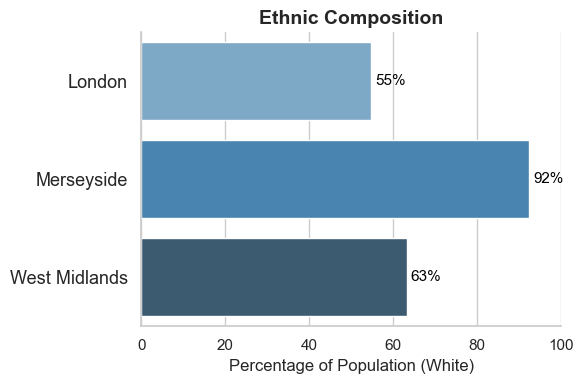

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by County and calculate mean percentage of White ethnic group
composition_df = ethnicity_data.groupby('County')['Ethnic group: White'].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=composition_df,
    x='Ethnic group: White',
    y='County',
    hue='County',
    palette='Blues_d',
    legend=False
)

# Labels and title
plt.xlabel("Percentage of Population (White)", fontsize=12)
plt.ylabel("")
plt.title("Ethnic Composition", fontsize=14, weight='bold')

# Add percentage labels
for i, v in enumerate(composition_df['Ethnic group: White']):
    ax.text(v + 1, i, f"{v:.0f}%", va='center', fontsize=11, color='black')

plt.xlim(0, 100)
ax.tick_params(axis='y', labelsize=13) 

# Keep left and bottom spines, remove top and right
sns.despine(top=True, right=True)

plt.tight_layout()
sns.set_theme(style="whitegrid") 

plt.savefig('../../Figures/Graphs/white_ethnic_group_by_county.png', format='png', bbox_inches='tight')

plt.show()


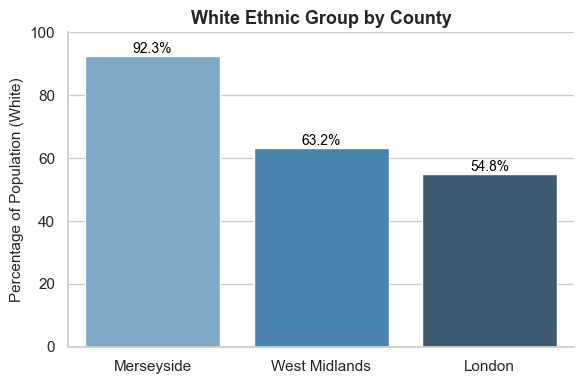

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by County and calculate mean percentage of White ethnic group
composition_df = ethnicity_data.groupby('County')['Ethnic group: White'].mean().reset_index()

# Sort by value if you want the bars in descending order
composition_df = composition_df.sort_values(by='Ethnic group: White', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=composition_df,
    x='County',
    y='Ethnic group: White',
    hue='County',
    palette='Blues_d',
    legend=False
)

# Labels and title
plt.ylabel("Percentage of Population (White)", fontsize=11)
plt.xlabel("")
plt.title("White Ethnic Group by County", fontsize=13, weight='bold')

# Add percentage labels above bars
for i, v in enumerate(composition_df['Ethnic group: White']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10, color='black')

plt.ylim(0, 100)

# Keep left and bottom spines, remove top and right
sns.despine(top=True, right=True)
sns.set_theme(style="whitegrid")  # or "ticks" for light ticks

plt.tight_layout()
plt.show()


# London & Merseyside Crime and Drug Crime

In [38]:
path = '../../Data/UK_Wide_Data'    

# find all csv file paths
csv_names = []

# loop all csv folders
for folder in os.listdir(path):
        
            # extract the CSVs in each folder
            folder_contents = os.listdir(f'{path}/{folder}')
            
            # loop through each file
            for file in folder_contents:
                
                    if "street.csv" in file:

                        # add each csv file name    
                        csv_names.append(f'{path}/{folder}/{file}')

# print the number of CSVs -- 108
print(f'There are {len(csv_names)} different CSVs')
csv_names

There are 1582 different CSVs


['../../Data/UK_Wide_Data/2020-01/2020-01-avon-and-somerset-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-bedfordshire-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-btp-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-cambridgeshire-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-cheshire-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-city-of-london-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-cleveland-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-cumbria-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-derbyshire-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-devon-and-cornwall-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-dorset-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-durham-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-dyfed-powys-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-essex-street.csv',
 '../../Data/UK_Wide_Data/2020-01/2020-01-gloucestershire-street.csv',
 '../

In [40]:
crime = []

# loop through the csvs
for csv in csv_names:
    

    if 'merseyside' in csv or 'metropolitan' in csv:
        # collect the stop and search data
        df = pd.read_csv(csv)
        df["source_file"] = csv  # Add column with the CSV filename
        crime.append(df)


# concat each df
crime_df = pd.concat(crime, ignore_index=True)

display(crime_df)


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,source_file
0,NaN,2020-01,Merseyside Police,Merseyside Police,-2.748271,53.386377,On or near Alderwood Court,E01012374,Halton 002A,Anti-social behaviour,NaN,NaN,../../Data/UK_Wide_Data/2020-01/2020-01-mersey...
1,0cfb58733343e311c99e006720056b52331a12b0658f26...,2020-01,Merseyside Police,Merseyside Police,-2.776888,53.380000,On or near Orchard Way,E01012420,Halton 004D,Other theft,Unable to prosecute suspect,NaN,../../Data/UK_Wide_Data/2020-01/2020-01-mersey...
2,b4e72c12cada8fb35f49a28d44e81f324651e8208ca34f...,2020-01,Merseyside Police,Merseyside Police,-2.776888,53.380000,On or near Orchard Way,E01012420,Halton 004D,Vehicle crime,Investigation complete; no suspect identified,NaN,../../Data/UK_Wide_Data/2020-01/2020-01-mersey...
3,NaN,2020-01,Merseyside Police,Merseyside Police,-2.869654,53.486687,On or near Birbeck Road,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN,../../Data/UK_Wide_Data/2020-01/2020-01-mersey...
4,NaN,2020-01,Merseyside Police,Merseyside Police,-2.869654,53.486687,On or near Birbeck Road,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN,../../Data/UK_Wide_Data/2020-01/2020-01-mersey...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904904,f3e9a764ed0544e7b653159ee0fa5b86f0307a35a87b20...,2022-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Local resolution,NaN,../../Data/UK_Wide_Data/2022-12/2022-12-metrop...
3904905,cf8d271a30bc90b5ce360ed5a6f03fd875e6c0def7dc5a...,2022-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN,../../Data/UK_Wide_Data/2022-12/2022-12-metrop...
3904906,5f09a471d9aad037a0cae3918417b7ab6fab400ce4a25d...,2022-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN,../../Data/UK_Wide_Data/2022-12/2022-12-metrop...
3904907,cee756dffd8caf076cbbf233061d665909f9de089ab2f7...,2022-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN,../../Data/UK_Wide_Data/2022-12/2022-12-metrop...


In [45]:
crime_df['year'] = crime_df['Month'].str.split('-').str[0]

In [ ]:
crime_df = crime_df[crime_df['year'] == '2022']
crime_df = crime_df[['year', 'Falls within', 'LSOA code', 'Crime type', ]]
crime_df['Drug Crime'] =  (crime_df['Crime type'] == 'Drugs').astype(int)

crime_df

,year,Falls within,LSOA code,Crime type
2611945,2022,Merseyside Police,E01012393,Other theft
2611946,2022,Merseyside Police,E01006448,Anti-social behaviour
2611947,2022,Merseyside Police,E01006448,Criminal damage and arson
2611948,2022,Merseyside Police,E01006448,Criminal damage and arson
2611949,2022,Merseyside Police,E01006448,Criminal damage and arson
...,...,...,...,...
3904904,2022,Metropolitan Police Service,NaN,Other crime
3904905,2022,Metropolitan Police Service,NaN,Other crime
3904906,2022,Metropolitan Police Service,NaN,Other crime
3904907,2022,Metropolitan Police Service,NaN,Other crime


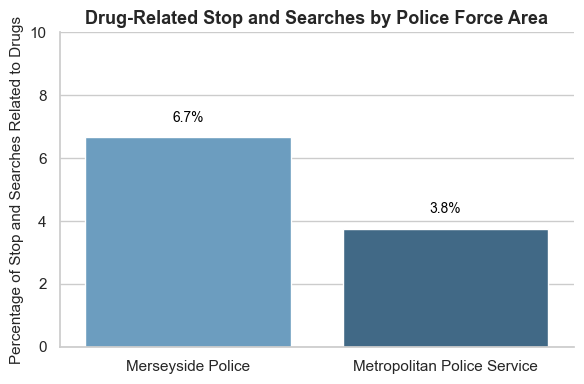

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of drug-related stops per area
drug_percentages = crime_df.groupby('Falls within')['Drug Crime'].mean() * 100

# Sort for clarity (optional)
drug_percentages = drug_percentages.sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=drug_percentages,
    x='Falls within',
    y='Drug Crime',
    hue='Falls within',
    palette='Blues_d',
    dodge=False,
    legend=False
)

# Labels and title
plt.ylabel("Percentage of Stop and Searches Related to Drugs", fontsize=11)
plt.xlabel("")
plt.title("Drug-Related Stop and Searches by Police Force Area", fontsize=13, weight='bold')

# Add percentage labels above bars
for i, v in enumerate(drug_percentages['Drug Crime']):
    ax.text(i, v + .5, f"{v:.1f}%", ha='center', fontsize=10, color='black')

plt.ylim(0, 10)

# Clean up plot style
sns.despine(top=True, right=True)
sns.set_theme(style="whitegrid")

plt.tight_layout()
plt.savefig('../../Figures/Graphs/drug_crime_by_county.png', format='png', bbox_inches='tight')

plt.show()
